In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns 
pd.set_option('display.max_columns', None)
# show entire rows
pd.set_option('display.max_rows', None)
# show all values in a cell
pd.set_option('display.max_colwidth', None)

In [13]:
# Carregamento e exploração dos dados

raw_df = pd.read_excel('../Data/raw_data.xlsx')
raw_df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380,553020.0,Médio


In [21]:
# Verificando o tamanho do dataset
print('O dataset possui {} linhas e {} colunas'.format(raw_df.shape[0], raw_df.shape[1]))
print('-----------------------------------------')
# Verificando os tipos de dados
print('Tipos de dados:')
print(raw_df.dtypes)

O dataset possui 456 linhas e 24 colunas
-----------------------------------------
Tipos de dados:
codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia       object
faturamento     float64
potencial        object
dtype: object


In [99]:
print('-----------------------------------------')
print('Valores não numéricos na coluna rendaMedia:')
print(raw_df[raw_df['rendaMedia'].str.contains(r'[^\d]+', regex=True)]['rendaMedia'].unique())

-----------------------------------------
Valores não numéricos na coluna rendaMedia:
['nan' '-']


In [101]:
# replace non-numeric values with NaN
raw_df['rendaMedia'] = raw_df['rendaMedia'].replace(r'[^\d]+', np.nan, regex=True)

In [104]:
data_type_dict = {
    'codigo': int,
    'nome': str,
    'cidade': str,
    'estado': str,
    'população': int,
    'popAte9': int,
    'popDe10a14': int,
    'popDe15a19': int,
    'popDe20a24': int,
    'popDe25a34': int,
    'popDe35a49': int,
    'popDe50a59': int,
    'popMaisDe60': int,
    'domiciliosA1': int,
    'domiciliosA2': int,
    'domiciliosB1': int,
    'domiciliosB2': int,
    'domiciliosC1': int,
    'domiciliosC2': int,
    'domiciliosD': int,
    'domiciliosE': int,
    'rendaMedia': float,
    'faturamento': float,
    'potencial': str
}

# convert columns to their respective data types
raw_df = raw_df.astype(data_type_dict)

# Verificando os tipos de dados
print('-----------------------------------------')
print('Tipos de dados:')
print(raw_df.dtypes)

-----------------------------------------
Tipos de dados:
codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia      float64
faturamento     float64
potencial        object
dtype: object


In [105]:
# Verificando a quantidade de valores nulos
print('-----------------------------------------')
print('Quantidade de valores nulos:')
print(raw_df.isnull().sum())

-----------------------------------------
Quantidade de valores nulos:
codigo            0
nome              0
cidade            0
estado            0
população         0
popAte9           0
popDe10a14        0
popDe15a19        0
popDe20a24        0
popDe25a34        0
popDe35a49        0
popDe50a59        0
popMaisDe60       0
domiciliosA1      0
domiciliosA2      0
domiciliosB1      0
domiciliosB2      0
domiciliosC1      0
domiciliosC2      0
domiciliosD       0
domiciliosE       0
rendaMedia        9
faturamento     296
potencial         0
dtype: int64


In [106]:
# Verificando a quantidade de valores únicos
print('-----------------------------------------')
print('Quantidade de valores únicos:')
print(raw_df.nunique())

-----------------------------------------
Quantidade de valores únicos:
codigo          456
nome            447
cidade            2
estado            2
população       453
popAte9         443
popDe10a14      439
popDe15a19      434
popDe20a24      438
popDe25a34      449
popDe35a49      449
popDe50a59      449
popMaisDe60     447
domiciliosA1    181
domiciliosA2    299
domiciliosB1    423
domiciliosB2    430
domiciliosC1    441
domiciliosC2    432
domiciliosD     345
domiciliosE     433
rendaMedia      416
faturamento     160
potencial         4
dtype: int64


In [107]:
# Analisando valores distintos de cidade, estado, potencial
print('-----------------------------------------')
print('Valores distintos de cidade, estado, potencial:')
print('Cidade: ', raw_df['cidade'].unique())
print('Estado: ', raw_df['estado'].unique())
print('Potencial: ', raw_df['potencial'].unique())

-----------------------------------------
Valores distintos de cidade, estado, potencial:
Cidade:  ['Rio de Janeiro' 'São Paulo']
Estado:  ['RJ' 'SP']
Potencial:  ['Médio' 'Baixo' 'Alto' 'nan']


In [108]:
# Dividindo o dataset entre raw_df_sp e raw_df_rj
raw_df_sp = raw_df[raw_df['estado'] == 'SP']
raw_df_rj = raw_df[raw_df['estado'] == 'RJ']

# Verificando o tamanho dos datasets
print('-----------------------------------------')
print('O dataset raw_df_sp possui {} linhas e {} colunas'.format(raw_df_sp.shape[0], raw_df_sp.shape[1]))
print('O dataset raw_df_rj possui {} linhas e {} colunas'.format(raw_df_rj.shape[0], raw_df_rj.shape[1]))

# Verificando a quantidade de valores nulos
print('-----------------------------------------')  
nulos_sp = raw_df_sp.isnull().sum()
nulos_rj = raw_df_rj.isnull().sum()

# Concatenando os resultados em um DataFrame
tabela_nulos = pd.concat([nulos_sp, nulos_rj], axis=1)
tabela_nulos.columns = ['nulos_df_sp', 'nulos_df_rj']
tabela_nulos.reset_index(inplace=True)
tabela_nulos.columns = ['coluna', 'nulos_df_sp', 'nulos_df_rj']

# Exibindo a tabela comparativa de valores nulos
print(tabela_nulos)

# Verificando a quantidade de valores únicos
print('-----------------------------------------')
unicos_sp = raw_df_sp.nunique()
unicos_rj = raw_df_rj.nunique()

# Concatenando os resultados em um DataFrame
tabela_unicos = pd.concat([unicos_sp, unicos_rj], axis=1)
tabela_unicos.columns = ['unicos_df_sp', 'unicos_df_rj']
tabela_unicos.reset_index(inplace=True)
tabela_unicos.columns = ['coluna', 'unicos_df_sp', 'unicos_df_rj']

# Exibindo a tabela comparativa de valores únicos
print(tabela_unicos)
    

-----------------------------------------
O dataset raw_df_sp possui 296 linhas e 24 colunas
O dataset raw_df_rj possui 160 linhas e 24 colunas
-----------------------------------------
          coluna  nulos_df_sp  nulos_df_rj
0         codigo            0            0
1           nome            0            0
2         cidade            0            0
3         estado            0            0
4      população            0            0
5        popAte9            0            0
6     popDe10a14            0            0
7     popDe15a19            0            0
8     popDe20a24            0            0
9     popDe25a34            0            0
10    popDe35a49            0            0
11    popDe50a59            0            0
12   popMaisDe60            0            0
13  domiciliosA1            0            0
14  domiciliosA2            0            0
15  domiciliosB1            0            0
16  domiciliosB2            0            0
17  domiciliosC1            0           

Aqui, podemos ver que só temos informação de faturamento para o estado do Rio de Janeiro e o dataset de São Paulo tem quase o dobro de linhas do dataset do Rio de Janeiro.

In [109]:
print('-----------------------------------------')
# Valores distintos de cidade, estado e potencial para SP
cidade_sp = raw_df_sp['cidade'].unique()
bairro_sp = raw_df_sp['nome'].unique()
potencial_sp = raw_df_sp['potencial'].unique()

# Valores distintos de cidade, estado e potencial para RJ
cidade_rj = raw_df_rj['cidade'].unique()
bairro_rj = raw_df_rj['nome'].unique()
potencial_rj = raw_df_rj['potencial'].unique()

# Criando um DataFrame para armazenar os valores distintos
tabela_distintos = pd.DataFrame({
    'coluna': ['cidade','bairro', 'potencial'],
    'SP': [cidade_sp, bairro_sp, potencial_sp],
    'RJ': [cidade_rj, bairro_rj, potencial_rj]
})

# Exibindo a tabela comparativa
tabela_distintos

-----------------------------------------


,coluna,SP,RJ
0,cidade,[São Paulo],[Rio de Janeiro]
1,bairro,"[A. E. Carvalho, Aclimação, Adventista, Água Branca, Água Funda, Água Rasa, Águia De Haia, Alfredo Pujol, Alto Da Lapa, Alto Da Mooca, Alto De Pinheiros, Ana Rosa, Anhanguera, Aricanduva, Armênia, Artur Alvim, Bandeirantes, Barra Funda, Bela Vista, Belém, Berrini - Vila Funchal, Bexiga, Boçava, Bom Retiro, Bonfiglioli, Bororé, Bosque Da Saúde, Brás, Brasilândia, Bresser, Brooklin, Butantã, Cachoeirinha, Cambuci, Campo Belo, Campo Grande, Campo Limpo, Cangaíba, Canindé, Cantareira, Capão Redondo, Capivari - Monos, Cardoso De Almeida, Casa Verde, Casa Verde Alta, Catumbi, Cdc Vigor, Ceasa, Centro Empresarial, Chácara Flora, Chácara Itaim, Chácara Klabin, Chácara Santo Antônio, Cidade Ademar, Cidade Dutra, Cidade Líder, Cidade Nitro-Operária, Cidade Quarto Centenário, Cidade Satélite, Cidade Tiradentes, Cidade Universitária, Cidade Vargas, Clínicas, Cocaia, Cohab Jova Rural, Congonhas, Consolação, Cratera - Colônia, Emissário, Encruzilhada - Barragem, Ermelino Matarazzo, Estação Tamanduateí, Eta Guaraú, Fábrica Bandeirante, Fazenda Caguaçu, Fazenda Da Juta, Fazenda Itaim, Fazenda Morumbi, Freguesia Do Ó, Gasômetro, Gleba Pêssego, Glicério, Grajaú, Granja Julieta, Guaianazes, Guarapiranga, Heliópolis, Higienópolis, Horto Florestal, Iguatemi, Independência, Interlagos, Ipiranga, Itaberaba, Itaim Paulista, Itaquera, Jabaquara, Jaçanã, Jaceguava, Jaguaré, ...]","[Abolição, Acari, Água Santa, Alto Da Boa Vista, Anchieta, Andaraí, Anil, Bancários, Bangu, Barra Da Tijuca, Barra De Guaratiba, Barros Filho, Benfica, Bento Ribeiro, Bonsucesso, Botafogo, Brás De Pina, Cachambi, Cacuia, Caju, Camorim, Campinho, Campo Dos Afonsos, Campo Grande, Cascadura, Catete, Catumbi, Cavalcanti, Centro, Cidade De Deus, Cidade Nova, Cidade Universitária, Cocotá, Coelho Neto, Colégio, Complexo Do Alemão, Copacabana, Cordovil, Cosme Velho, Cosmos, Costa Barros, Curicica, Del Castilho, Deodoro, Encantado, Engenheiro Leal, Engenho Da Rainha, Engenho De Dentro, Engenho Novo, Estácio, Flamengo, Freguesia (Ilha Do Governador), Freguesia (Jacarepaguá), Galeão, Gamboa, Gardênia Azul, Gávea, Gericinó, Glória, Grajaú, Grumari, Guadalupe, Guaratiba, Higienópolis, Honório Gurgel, Humaitá, Inhaúma, Inhoaíba, Ipanema, Irajá, Itanhangá, Jacaré, Jacarepaguá, Jacarezinho, Jardim América, Jardim Botânico, Jardim Carioca, Jardim Guanabara, Jardim Sulacap, Joá, Lagoa, Laranjeiras, Leblon, Leme, Lins De Vasconcelos, Madureira, Magalhães Bastos, Mangueira, Manguinhos, Maracanã, Maré, Marechal Hermes, Maria Da Graça, Méier, Moneró, Olaria, Oswaldo Cruz, Paciência, Padre Miguel, Paquetá, ...]"
2,potencial,[nan],"[Médio, Baixo, Alto]"


Podemos ver aqui que os dados de potencial de São Paulo não são nulos, são em string "nan". Vamos substituir esses valores por NaN.

In [110]:
# Analise de duplicatas em relação ao nome do bairro
print('-----------------------------------------')
print('Quantidade de duplicatas em relação ao nome do bairro:')
print('SP: ', raw_df_sp['nome'].duplicated().sum())
print('RJ: ', raw_df_rj['nome'].duplicated().sum())

-----------------------------------------
Quantidade de duplicatas em relação ao nome do bairro:
SP:  0
RJ:  0


In [111]:
# Analise de duplicatas em relação ao codigo
print('-----------------------------------------')
print('Quantidade de duplicatas em relação ao nome do bairro:')
print('SP: ', raw_df_sp['codigo'].duplicated().sum())
print('RJ: ', raw_df_rj['codigo'].duplicated().sum())

-----------------------------------------
Quantidade de duplicatas em relação ao nome do bairro:
SP:  0
RJ:  0


In [112]:
clean_df_rj = raw_df_rj.copy()
clean_df_sp = raw_df_sp.copy()
# convertendo a coluna 'potencial' para valores numéricos
clean_df_rj['potencial'] = clean_df_rj['potencial'].replace({'Alto': 2, 'Médio': 1, 'Baixo': 0})
# drop coluna codigo
clean_df_rj.drop('codigo', axis=1, inplace=True)

In [113]:
# Matriz de correlação RJ
print('-----------------------------------------')
print('Matriz de correlação RJ:')
corr_rj = clean_df_rj.corr(numeric_only=True)
corr_rj.style.background_gradient(cmap='coolwarm')

-----------------------------------------
Matriz de correlação RJ:


,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
população,1.000000,0.970797,0.972057,0.985313,0.990373,0.989377,0.986526,0.991235,0.924673,0.186290,0.293839,0.565726,0.905305,0.928378,0.861343,0.832363,0.822980,-0.026747,-0.166563,0.380326
popAte9,0.970797,1.000000,0.999140,0.994495,0.988292,0.949930,0.934287,0.946176,0.822485,0.043099,0.118759,0.384971,0.790162,0.870195,0.831198,0.808531,0.781555,-0.071316,-0.300307,0.255667
popDe10a14,0.972057,0.999140,1.000000,0.995850,0.987774,0.948990,0.936012,0.949140,0.826978,0.029706,0.108616,0.383258,0.797436,0.876245,0.835387,0.813732,0.784861,-0.078434,-0.306282,0.259085
popDe15a19,0.985313,0.994495,0.995850,1.000000,0.995039,0.970848,0.961319,0.962284,0.852647,0.059684,0.147259,0.425413,0.835775,0.910146,0.869813,0.846498,0.821901,-0.075903,-0.293721,0.296052
popDe20a24,0.990373,0.988292,0.987774,0.995039,1.000000,0.981342,0.967448,0.969580,0.873030,0.103014,0.200898,0.474706,0.856208,0.913433,0.861188,0.833742,0.809816,-0.059987,-0.250416,0.322076
popDe25a34,0.989377,0.949930,0.948990,0.970848,0.981342,1.000000,0.994647,0.969477,0.902734,0.198600,0.303916,0.563934,0.907814,0.951993,0.902184,0.874031,0.863436,-0.037166,-0.195332,0.396222
popDe35a49,0.986526,0.934287,0.936012,0.961319,0.967448,0.994647,1.000000,0.973315,0.916271,0.224111,0.328107,0.588285,0.924404,0.958461,0.905541,0.878573,0.873529,-0.025153,-0.170591,0.421356
popDe50a59,0.991235,0.946176,0.949140,0.962284,0.969580,0.969477,0.973315,1.000000,0.956639,0.247188,0.363377,0.634230,0.924839,0.902424,0.807894,0.774645,0.773025,0.009856,-0.067345,0.417621
popMaisDe60,0.924673,0.822485,0.826978,0.852647,0.873030,0.902734,0.916271,0.956639,1.000000,0.397839,0.550859,0.802572,0.956781,0.846138,0.715222,0.677137,0.703864,0.074336,0.139008,0.497578
domiciliosA1,0.186290,0.043099,0.029706,0.059684,0.103014,0.198600,0.224111,0.247188,0.397839,1.000000,0.925528,0.716429,0.257212,0.047665,-0.040489,-0.071094,0.064017,0.502224,0.754193,0.338494


In [114]:
cluster_summary = clean_df_rj.groupby('potencial')
cluster_summary.median(numeric_only=True)

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
0,15020.5,1906.0,883.0,1144.5,1207.5,2451.5,3240.5,1662.5,2113.0,0.0,1.5,317.0,693.5,1360.0,1225.5,233.5,782.0,1535.0,793291.0
1,27714.5,3371.0,1712.0,2280.0,2151.0,4568.5,6234.0,3425.0,4940.0,0.0,111.5,933.0,1841.5,2800.0,2255.5,366.5,1083.0,1897.0,796358.0
2,46711.5,4551.5,2212.5,3114.0,3246.0,7142.0,9604.0,6420.5,10390.5,144.0,872.0,2995.0,3394.0,4312.0,3304.0,421.5,1657.0,3039.0,1086942.0


In [115]:
cluster_summary.mean(numeric_only=True)

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
0,17156.967742,2237.467742,1047.258065,1385.096774,1441.290323,2775.854839,3633.241935,2008.322581,2628.435484,18.741935,76.532258,425.564516,863.177419,1510.612903,1490.596774,287.887097,975.483871,1664.596491,7.819339e+05
1,41602.840000,5722.720000,2676.280000,3472.960000,3335.900000,6598.480000,8921.820000,4803.220000,6071.460000,55.760000,183.040000,1046.760000,2104.340000,3776.200000,3694.240000,719.000000,2280.500000,3008.285714,7.140762e+05
2,76683.791667,8912.312500,4140.979167,5500.437500,5828.041667,11489.354167,15436.375000,10176.770833,15199.520833,1212.625000,1738.041667,4598.479167,4643.291667,5914.750000,4329.166667,773.770833,2436.520833,6528.229167,1.166706e+06


In [116]:
cluster_summary.std(numeric_only=True)

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
0,11084.985145,1683.903318,773.542796,988.373406,1011.108552,1810.458622,2332.482802,1284.081119,1754.411672,103.379602,236.240411,504.848934,591.543231,956.028437,1127.523624,241.364978,844.479522,628.370707,139058.492489
1,41190.144924,6697.358258,3056.827267,3864.309844,3508.182227,6725.655383,8763.825722,4264.546028,4788.337644,175.931058,385.010626,838.459023,1514.706661,3559.605453,4295.415570,904.911045,2865.285371,3545.869134,334438.324519
2,100005.278860,17873.044429,8171.131262,9235.051758,8995.920707,13488.871755,16819.185006,12483.041917,15299.764183,2372.113329,2424.389978,4215.679764,3864.474950,6133.470735,5291.999909,1093.706838,2594.903237,9686.685390,618101.482448


In [117]:
# quartiles
cluster_summary.quantile([0.25, 0.5, 0.75])

/tmp/ipykernel_1642/3958578921.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary.quantile([0.25, 0.5, 0.75])


população  popAte9  popDe10a14  popDe15a19  popDe20a24  \
potencial                                                                
0         0.25    9117.75   905.25      424.75      638.50      708.25   
          0.50   15020.50  1906.00      883.00     1144.50     1207.50   
          0.75   25530.75  3233.75     1455.25     1957.75     2107.75   
1         0.25   13462.25  1400.00      721.75      950.75      907.00   
          0.50   27714.50  3371.00     1712.00     2280.00     2151.00   
          0.75   55035.25  7363.50     3505.00     4611.00     4258.75   
2         0.25   39261.75  3115.75     1366.75     2109.25     2393.75   
          0.50   46711.50  4551.50     2212.50     3114.00     3246.00   
          0.75   81809.50  8133.00     3807.25     5343.50     5965.25   

                popDe25a34  popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  \
potencial                                                                       
0         0.25     1415.50     1957.75     1109.00      1439.75           0.0   
          0.50     2451.50     3240.50     1662.50      2113.00           0.0   
          0.75     3983.25     5301.50     2929.00      3766.00           0.0   
1         0.25     2101.00     2982.50     1870.75      2851.00           0.0   
          0.50     4568.50     6234.00     3425.00      4940.00           0.0   
          0.75     7866.75    11417.00     6301.00      8173.75           0.0   
2         0.25     5837.25     8251.75     5055.25      7305.75           0.0   
          0.50     7142.00     9604.00     6420.50     10390.50         144.0   
          0.75    13069.75    16272.00     9532.75     15352.00        1361.5   

                domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  \
potencial                                                                
0         0.25          0.00        128.75        483.00        716.00   
          0.50          1.50        317.00        693.50       1360.00   
          0.75         81.50        498.50       1226.25       2187.50   
1         0.25          0.00        698.25       1177.50       1262.75   
          0.50        111.50        933.00       1841.50       2800.00   
          0.75        194.75       1244.50       2478.00       4890.00   
2         0.25        405.50       2030.75       2386.50       2816.50   
          0.50        872.00       2995.00       3394.00       4312.00   
          0.75       1836.25       5270.00       5068.00       6335.25   

                domiciliosC2  domiciliosD  domiciliosE  rendaMedia  \
potencial                                                            
0         0.25        586.50        80.00       290.50     1227.00   
          0.50       1225.50       233.50       782.00     1535.00   
          0.75       2284.75       418.50      1477.75     1884.00   
1         0.25        805.75       105.50       336.00     1384.00   
          0.50       2255.50       366.50      1083.00     1897.00   
          0.75       4224.00       824.00      3746.25     2511.00   
2         0.25       1343.00       178.50       945.25     2051.75   
          0.50       3304.00       421.50      1657.00     3039.00   
          0.75       4443.25       858.25      2802.50     7962.00   

                faturamento  
potencial                    
0         0.25    720843.00  
          0.50    793291.00  
          0.75    846434.75  
1         0.25    554922.75  
          0.50    796358.00  
          0.75    930128.00  
2         0.25    821226.50  
          0.50   1086942.00  
          0.75   1500667.50

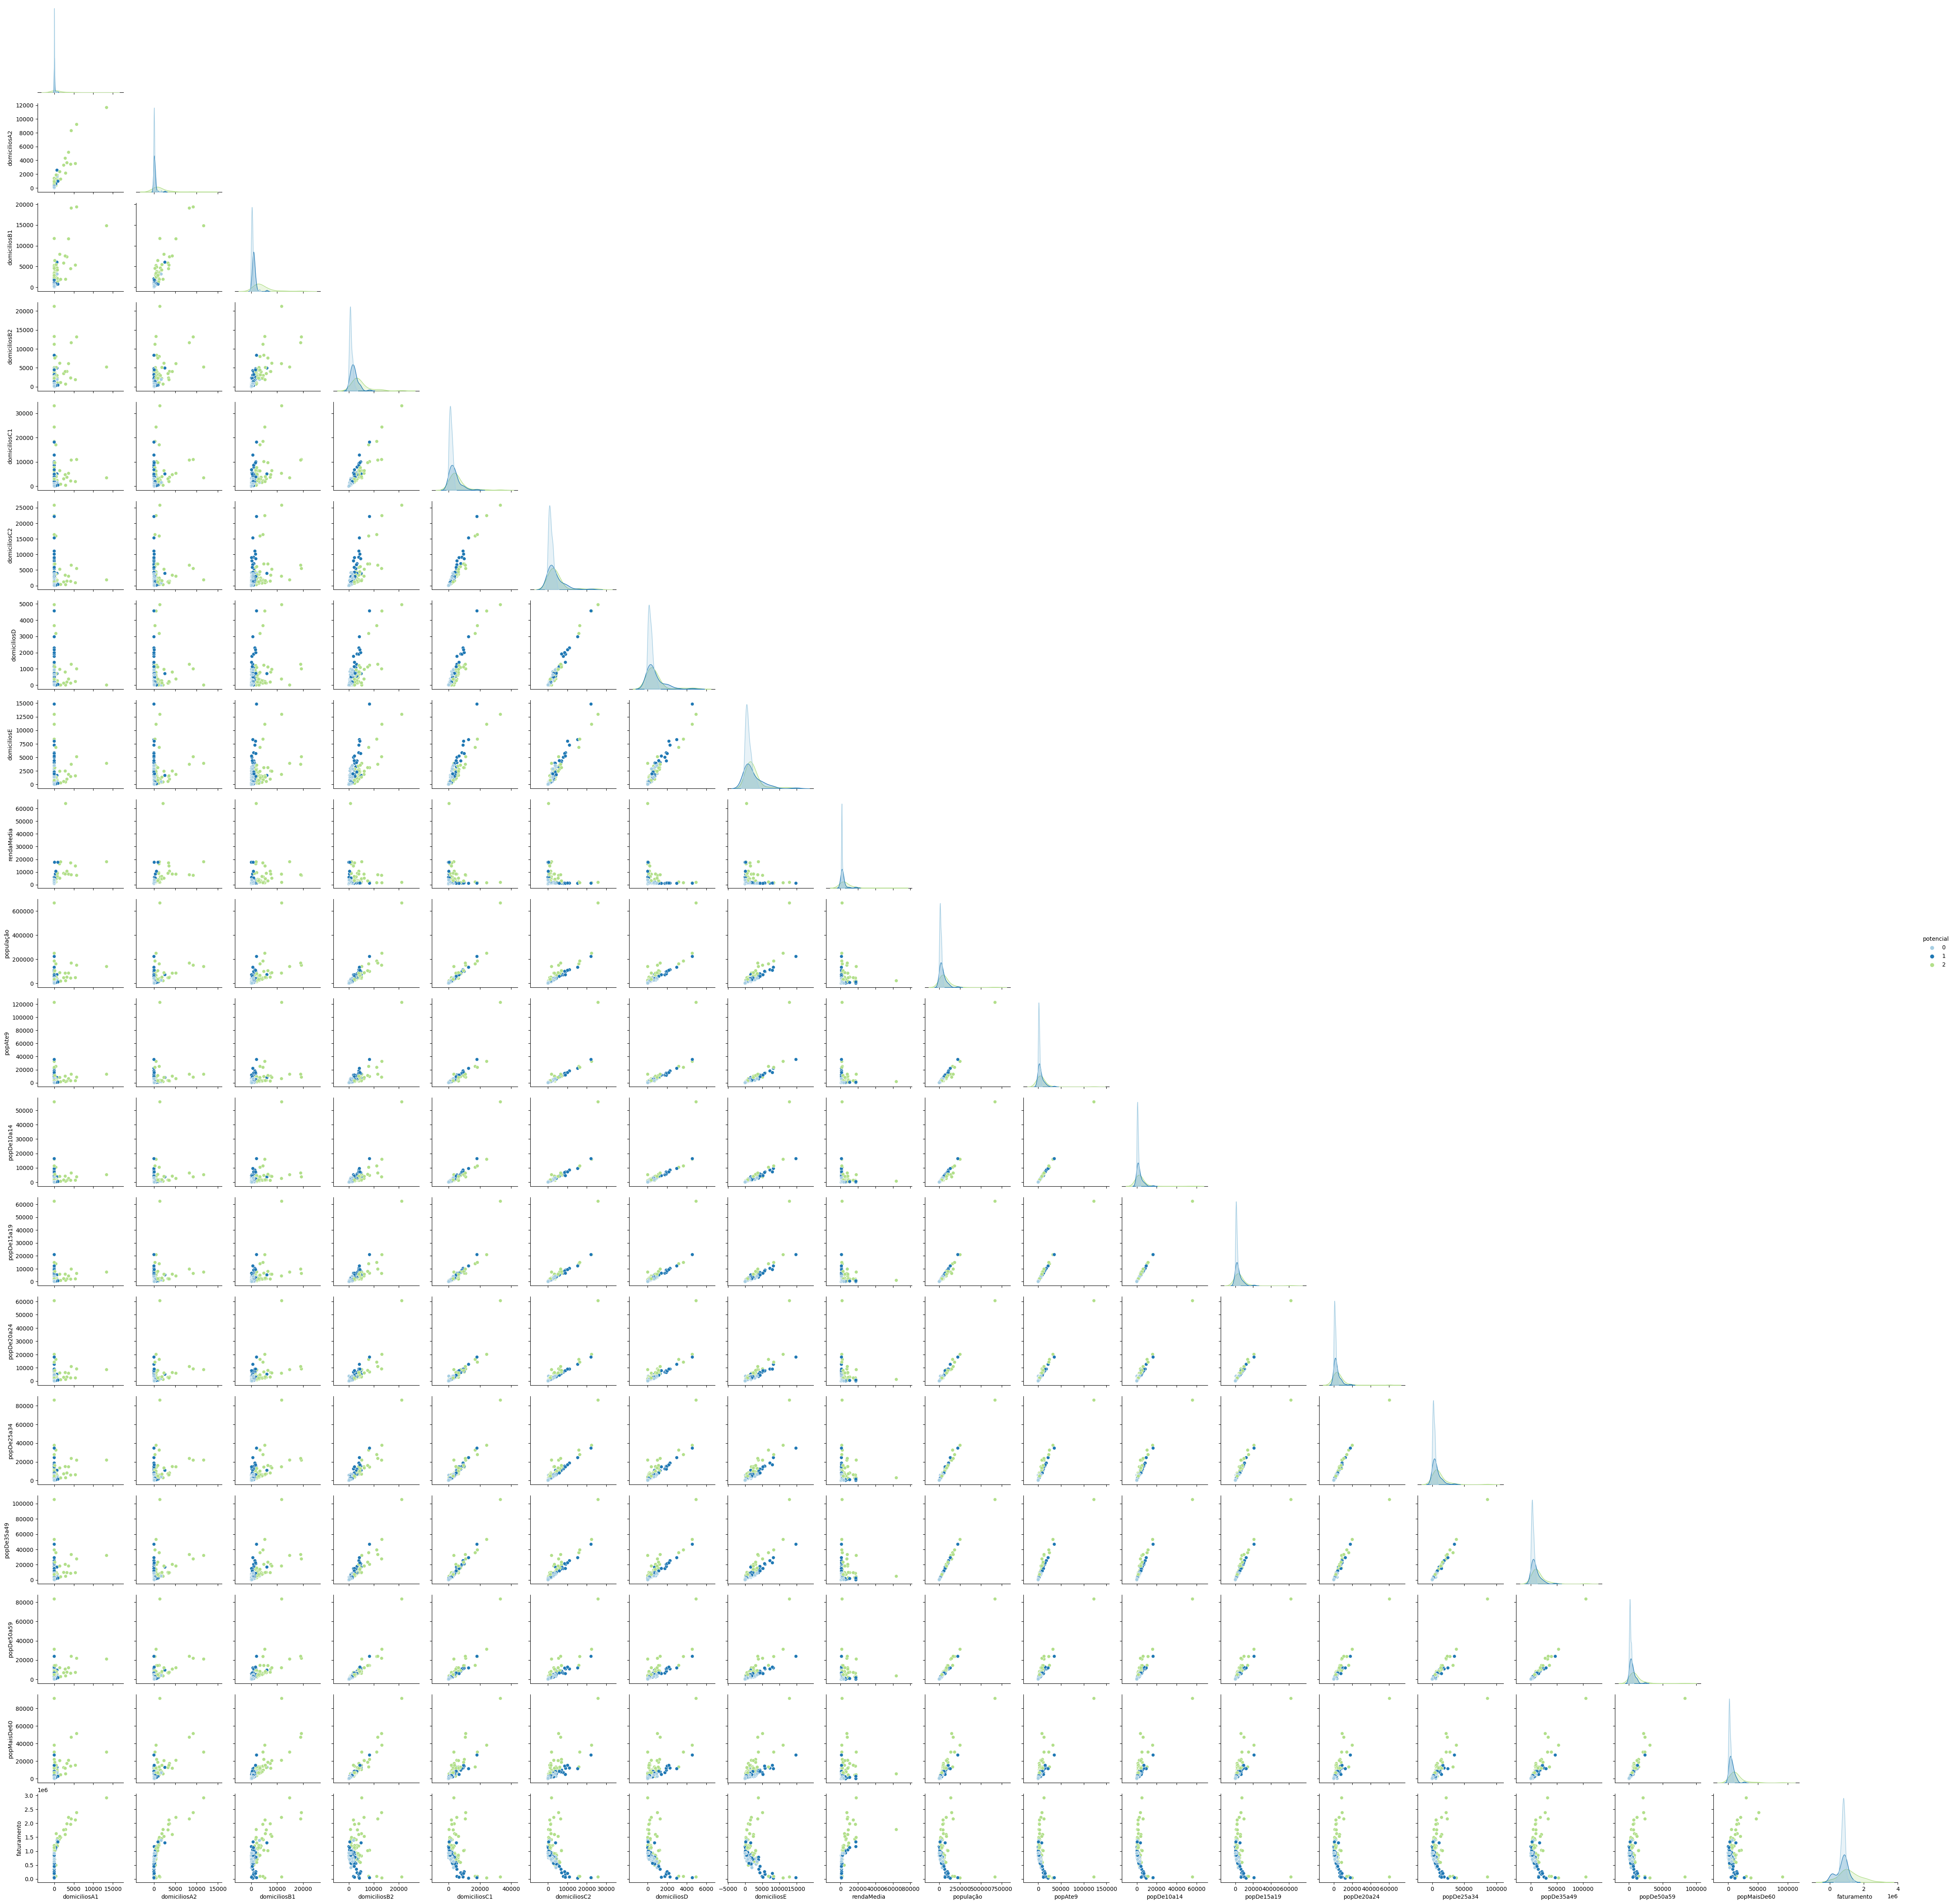

In [120]:
dados_domicilios = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']
dados_população = ['rendaMedia','população','popAte9','popDe10a14','popDe15a19','popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60']
dados_faturamento = ['faturamento']
dados = dados_domicilios + dados_população + dados_faturamento
p=sns.pairplot(clean_df_rj, vars = dados, hue='potencial', palette='Paired',corner=True)
#p.map_lower(sns.kdeplot, levels=4, color=".2", cmap='Paired')
p

<AxesSubplot: xlabel='potencial', ylabel='faturamento'>

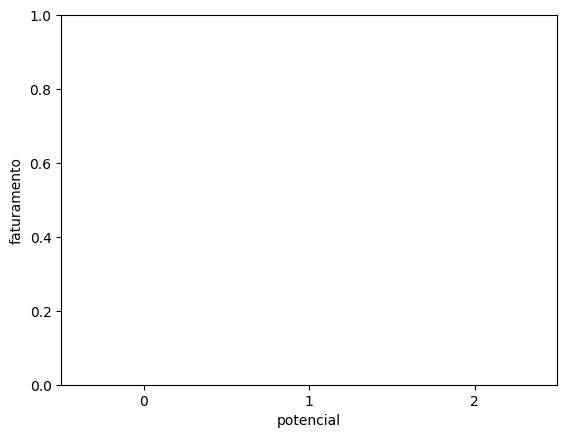

In [119]:
# boxplot de faturamento por potencial
sns.boxplot(x='potencial', y='faturamento', data=clean_df_rj, palette='Paired', order=['0', '1', '2'])  
